<a href="https://colab.research.google.com/github/sattviksahai/CS583B_Recitation/blob/master/Recitation_5_Numerical_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Copy data from drive ###

In [5]:
!cp drive/My\ Drive/data/diabetes_dataset.txt ./diabetes_dataset.txt

## Data Loading and Processing ##

In [10]:
from sklearn import datasets
import numpy as np

x_sparse, y = datasets.load_svmlight_file('diabetes_dataset.txt')
x = x_sparse.todense()

print('shape of x {}'.format(x.shape))
print('shape of y {}'.format(y.shape))

shape of x (768, 8)
shape of y (768,)


## Display a few examples from the dataset ##

In [12]:
import random

for i in range(10):
  index = random.randint(0,x.shape[0])
  print("feature {}, label {}".format(x[index,:], y[index]))

feature [[0.00e+00 1.39e+02 6.20e+01 1.70e+01 2.10e+02 2.21e+01 2.07e-01 2.10e+01]], label 1.0
feature [[ 13.       126.        90.         0.         0.        43.400002
    0.583     42.      ]], label -1.0
feature [[ 17.       163.        72.        41.       114.        40.900002
    0.817     47.      ]], label -1.0
feature [[  1.       116.        78.        29.       180.        36.099998
    0.496     25.      ]], label 1.0
feature [[ 6.       85.       78.        0.        0.       31.200001  0.382
  42.      ]], label 1.0
feature [[ 4.       92.       80.        0.        0.       42.200001  0.237
  29.      ]], label 1.0
feature [[  4.    114.     65.      0.      0.     21.9     0.432  37.   ]], label 1.0
feature [[  2.    144.     58.     33.    135.     31.6     0.422  25.   ]], label -1.0
feature [[  4.    145.     82.     18.      0.     32.5     0.235  70.   ]], label -1.0
feature [[3.0000000e+00 1.7300000e+02 8.4000000e+01 3.3000000e+01 4.7400000e+02
  3.5700001e+01 2

## Partition Dataset to training and testing ##

In [17]:
n = x.shape[0]
n_train = 640
n_test = n-n_train

rand_indices = np.random.permutation(n)
train_indices = rand_indices[:n_train]
test_indices = rand_indices[n_train:]

x_train = x[train_indices, :]
x_test = x[test_indices, :]

y_train = y[train_indices].reshape(n_train, 1)
y_test = y[test_indices].reshape(n_test, 1)

print("Shape of x_train {}".format(x_train.shape))
print("Shape of x_test {}".format(x_test.shape))
print("Shape of y_train {}".format(y_train.shape))
print("Shape of y_test {}".format(y_test.shape))

Shape of x_train (640, 8)
Shape of x_test (128, 8)
Shape of y_train (640, 1)
Shape of y_test (128, 1)


## Feature Scaling ##

In [19]:
import numpy as np

d = x_train.shape[1]

mu = np.mean(x_train, axis=0).reshape(1, d)
sigma = np.std(x_train, axis=0).reshape(1, d)

# transform training data
x_train = (x_train - mu)/(sigma + 1E-6)

# transform test data
x_test = (x_test - mu)/(sigma + 1E-6)

print(np.mean(x_test, axis=0))
print(np.std(x_test, axis=0))

[[ 0.04615855 -0.14770997 -0.09198002 -0.10344382 -0.19383759 -0.08987246
  -0.01814557 -0.10059873]]
[[0.90481825 1.11845233 1.0053347  0.96916155 0.75254191 1.02680981
  0.97833158 0.86064507]]


## Add a dimension of all ones (bias) ##

In [20]:
n_train, d = x_train.shape
x_train = np.concatenate((x_train, np.ones((n_train, 1))), axis=1)

n_test, d = x_test.shape
x_test = np.concatenate((x_test, np.ones((n_test, 1))), axis=1)

print('shape of x_train {}'.format(x_train.shape))
print('shape of x_test {}'.format(x_test.shape))

shape of x_train (640, 9)
shape of x_test (128, 9)


# Logistic regression model #
The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

In [29]:
# w - d x 1
# x - n x d
# y - n x 1
# lam - scalar
def objective(w, x, y, lam):
  n, d = x.shape
  yx = np.multiply(y, x)
  yxw = np.dot(yx, w)
  vec1 = np.exp(-yxw)
  vec2 = np.log(1+vec1)
  loss = np.mean(vec2)

  reg = (lam/2) * np.sum(w*w)
  return loss+reg
objective(np.random.randn(9,1), np.random.randn(3,9), np.random.randn(3,1), 2)

8.094416519398766

## Optimization ##

In [30]:
def optim(x, y, lam, max_iter, w=None):
  n, d = x.shape

  # store obj values
  objvals = np.zeros(max_iter)

  # init x
  if w is None:
    w = np.zeros((d,1))
  
  for t in range(max_iter):
    obj_val = objective(w,x,y, lam)
    objvals[t] = obj_val
    print("Iteration {}, obj value {}".format(t, obj_val))

    # random opt
    w = np.random.randn(d,1)
  return w, objvals


### Run random optimization ###

In [31]:
lam = 1E-6
w, obj_vals = optim(x_train, y_train, lam, 50)

Iteration 0, obj value 0.6931471805599453
Iteration 1, obj value 0.9047248902288059
Iteration 2, obj value 0.789157266177219
Iteration 3, obj value 1.0509489549850601
Iteration 4, obj value 0.9391845094674156
Iteration 5, obj value 0.8701097228055873
Iteration 6, obj value 1.3480710599051162
Iteration 7, obj value 1.8743513886612988
Iteration 8, obj value 1.1897538998034902
Iteration 9, obj value 2.448717830608694
Iteration 10, obj value 1.4193324065371915
Iteration 11, obj value 0.9053780225651208
Iteration 12, obj value 0.9613235054619311
Iteration 13, obj value 1.3141987724314486
Iteration 14, obj value 1.8739747721642772
Iteration 15, obj value 1.861902896282834
Iteration 16, obj value 1.5702027630941697
Iteration 17, obj value 1.5779599526963632
Iteration 18, obj value 1.7084906122524797
Iteration 19, obj value 1.5206821413959533
Iteration 20, obj value 2.015769553955313
Iteration 21, obj value 1.375573995664362
Iteration 22, obj value 2.2757077931091567
Iteration 23, obj value 1.

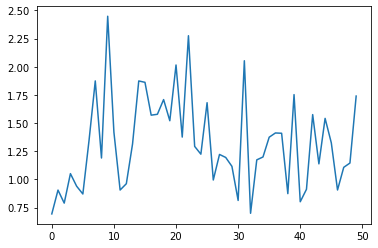

In [32]:
import matplotlib.pyplot as plt

epochs = range(len(obj_vals))

plt.plot(epochs, obj_vals)
plt.show()